<a href="https://colab.research.google.com/github/ananya-ayasi/DL-for-Audio/blob/main/MTF_GRU_Multihead_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import csv
import os
import librosa
import glob
import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -q python_speech_features
from python_speech_features import mfcc, logfbank, delta

In [4]:
no_mfcc=13
no_mtf=7
no_features=3*no_mfcc+no_mtf
N_classes=8 

In [5]:
# Initial Parameters
utterance_length = 4600   # maximum-found manually

In [6]:
folders=os.listdir(path='/content/drive/MyDrive/NEW_MTF')
print(folders)

['Niram4_train_mtf', 'Niram8_test_mtf', 'Niram4_test_mtf', 'Niram5_test_mtf', 'Niram5_train_mtf', 'Niram6_test_mtf', 'Niram8_train_mtf', 'Niram7_train_mtf', 'Niram6_train_mtf', 'Niram7_test_mtf', 'Niram2_test_mtf', 'Niram2_train_mtf', 'Niram3_train_mtf', 'Niram1_test_mtf', 'Niram3_test_mtf', 'Niram1_train_mtf']


In [7]:
X=np.zeros((384,46,utterance_length))
XP1=np.zeros((utterance_length,7))

In [8]:
y=np.zeros((384))
train=np.zeros((384))

In [9]:
file_no=0

In [11]:
for i in range(len(folders)):

  files=glob.glob('/content/drive/MyDrive/NEW_MTF/'+folders[i]+'/*')
  res = folders[i].split('_')
  label=res[0].split('m')[1]
  f2='Niram'+label
  label=int(label)-1
  
  if res[1]=='train':
    train1=1
    f1='Niram_train/'
    f3='_train_new/'
  else:
    train1=0
    f1='Niram_test/'
    f3='_test_new/'

  for ff in files:

    print('filename-------',ff)
    f4=ff.split('/')[6]
    audio='/content/drive/MyDrive/'+f1+f2+f3+f4+'.wav'
    print('audio name---',audio)
    print('label--', label,train1)

    df = pandas.read_csv(ff,header=None)
    XP=df.iloc[:,0:no_mtf].values
    XP1[:XP.shape[0],:]=XP
    
    audio_signal,sr =librosa.load(audio,sr=None)

    mfcc_features = librosa.feature.mfcc(y=audio_signal,sr=sr,n_mfcc=no_mfcc,hop_length=int(0.010*sr), n_fft=int(0.030*sr))
    d1_mfcc_feat = delta(mfcc_features, 2)
    d2_mfcc_feat = delta(d1_mfcc_feat, 2)
    
    if mfcc_features.shape[1] > utterance_length:
        mfcc_features1 = mfcc_features[:, 0:utterance_length]
        d1_mfcc_feat1=d1_mfcc_feat[:, 0:utterance_length]
        d2_mfcc_feat1=d2_mfcc_feat[:, 0:utterance_length]
        
    else:
        mfcc_features1 = np.pad(mfcc_features, ((0, 0), (0, utterance_length - mfcc_features.shape[1])),
                               mode='constant', constant_values=0)
        d1_mfcc_feat1 =np.pad(d1_mfcc_feat , ((0, 0), (0, utterance_length - mfcc_features.shape[1])),
                               mode='constant', constant_values=0)
        d2_mfcc_feat1 =np.pad(d2_mfcc_feat , ((0, 0), (0, utterance_length - mfcc_features.shape[1])),
                               mode='constant', constant_values=0)
        
    if mfcc_features1.shape[1] > XP.shape[0]:
         XP1[XP.shape[0]:mfcc_features.shape[1],:]=np.zeros(((mfcc_features.shape[1]-XP.shape[0]),7))

    combined=np.zeros((46,utterance_length))
    combined[:13,] = mfcc_features1
    combined[13:26,]=d1_mfcc_feat1
    combined[26:39,]=d2_mfcc_feat1
    combined[39:46,]=XP1.T
    y[file_no]=int(label)
    train[file_no]=train1
    X[file_no,:]=combined
    file_no=file_no+1

filename------- /content/drive/MyDrive/NEW_MTF/Niram4_train_mtf/Padhavikal4
audio name--- /content/drive/MyDrive/Niram_train/Niram4_train_new/Padhavikal4.wav
label-- 3 1
filename------- /content/drive/MyDrive/NEW_MTF/Niram4_train_mtf/Padhavikal4_aug1
audio name--- /content/drive/MyDrive/Niram_train/Niram4_train_new/Padhavikal4_aug1.wav
label-- 3 1
filename------- /content/drive/MyDrive/NEW_MTF/Niram4_train_mtf/Padhavikal4_aug2
audio name--- /content/drive/MyDrive/Niram_train/Niram4_train_new/Padhavikal4_aug2.wav
label-- 3 1
filename------- /content/drive/MyDrive/NEW_MTF/Niram4_train_mtf/Padhavikal_mix4
audio name--- /content/drive/MyDrive/Niram_train/Niram4_train_new/Padhavikal_mix4.wav
label-- 3 1
filename------- /content/drive/MyDrive/NEW_MTF/Niram4_train_mtf/Pinvathil4
audio name--- /content/drive/MyDrive/Niram_train/Niram4_train_new/Pinvathil4.wav
label-- 3 1
filename------- /content/drive/MyDrive/NEW_MTF/Niram4_train_mtf/Pinvathil_mix4
audio name--- /content/drive/MyDrive/Niram_tr

In [12]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y1 = np_utils.to_categorical(encoded_Y)

In [13]:
y1.shape

(384, 8)

In [14]:
X.shape

(384, 46, 4600)

In [15]:
input_shape=X.shape[1:]

In [16]:
input_shape

(46, 4600)

In [17]:
X_train, X_test, y_train_n, y_test_n = train_test_split(X, y1, test_size=0.375, random_state=1332, stratify=y1)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
sc1=MinMaxScaler()

def norml_std(t):
  for i,data in enumerate(t):
    t[i]=sc.fit_transform(data)
  return t 

def norml_minmax(t):
  for i,data in enumerate(t):
    t[i]=sc1.fit_transform(data)
  return t    

from tensorflow.keras.optimizers import SGD
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.layers.core import Dropout
N_samples=len(X_train)
print(N_samples)
audio_features=46
N_classes=8
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sn
labels=['Niram1','Niram2','Niram3','Niram4','Niram5','Niram6','Niram7','Niram8']

240


In [19]:
input_shape=[46,4600]

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs,inputs)
    x = layers.Dropout(dropout)(x)
    #x = layers.GRU(units=16, dropout=0.05, recurrent_dropout=0.35, return_sequences=True)(x)
    x = layers.GRU(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False)(x)
    outputs = layers.Dense(N_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [42]:
model = build_model(input_shape, head_size=2,num_heads=6, mlp_units=[128],mlp_dropout=0.4,dropout=0.25)

In [43]:
model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 46, 4600)]   0                                            
__________________________________________________________________________________________________
multi_head_attention_3 (MultiHe (None, 46, 4600)     225436      input_5[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 46, 4600)     0           multi_head_attention_3[0][0]     
__________________________________________________________________________________________________
gru_4 (GRU)                     (None, 32)           444864      dropout_3[0][0]            

In [44]:
print("Training ...")
# fit the keras model on the dataset
history=model.fit(X_train, y_train_n, epochs=120, batch_size=32, validation_split=0.1)

Training ...
Epoch 1/120
7/7 [==============================] - 10s 960ms/step - loss: 2.7402 - accuracy: 0.1019 - val_loss: 2.5742 - val_accuracy: 0.0417
Epoch 2/120
7/7 [==============================] - 6s 815ms/step - loss: 2.5223 - accuracy: 0.1343 - val_loss: 2.6210 - val_accuracy: 0.1250
Epoch 3/120
7/7 [==============================] - 6s 810ms/step - loss: 2.4665 - accuracy: 0.1204 - val_loss: 2.5128 - val_accuracy: 0.1250
Epoch 4/120
7/7 [==============================] - 6s 805ms/step - loss: 2.4234 - accuracy: 0.1343 - val_loss: 2.5105 - val_accuracy: 0.0833
Epoch 5/120
7/7 [==============================] - 6s 809ms/step - loss: 2.5446 - accuracy: 0.1435 - val_loss: 2.4060 - val_accuracy: 0.0417
Epoch 6/120
7/7 [==============================] - 6s 811ms/step - loss: 2.5187 - accuracy: 0.1481 - val_loss: 2.4060 - val_accuracy: 0.0833
Epoch 7/120
7/7 [==============================] - 6s 813ms/step - loss: 2.5490 - accuracy: 0.1250 - val_loss: 2.4284 - val_accuracy: 0.1250

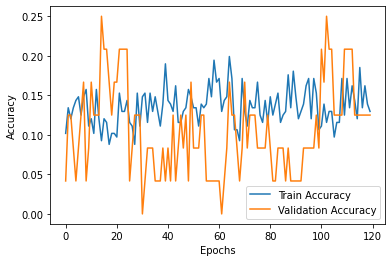

In [46]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [45]:
# evaluate the keras model
print("\nTesting ...")
score, accuracy = model.evaluate(X_test, y_test_n, batch_size=64, verbose=1)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)

#test_loss, accuracy = model.evaluate(X_test, y_test)
#print('Accuracy: %.2f' % (accuracy*100))
#print('test loss : %.2f' % (test_loss))


Testing ...
3/3 [==============================] - 0s 108ms/step - loss: 2.1026 - accuracy: 0.1250
Test loss:   2.1025502681732178
Test accuracy:   0.125
